In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: MT
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


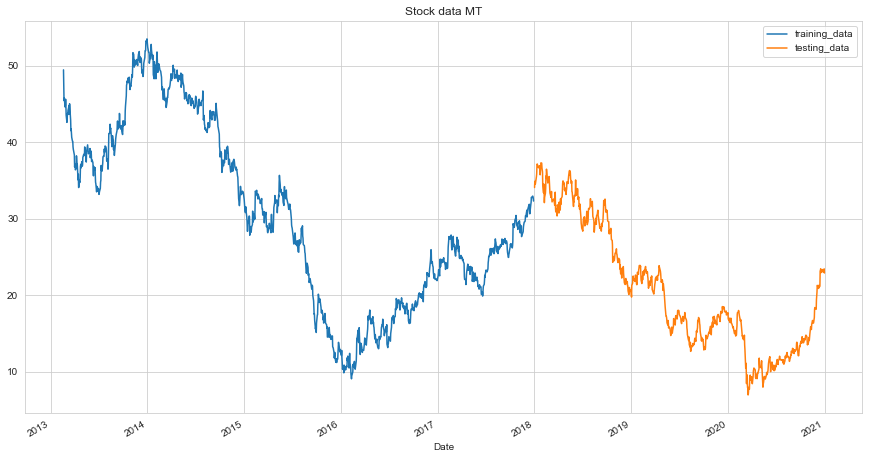

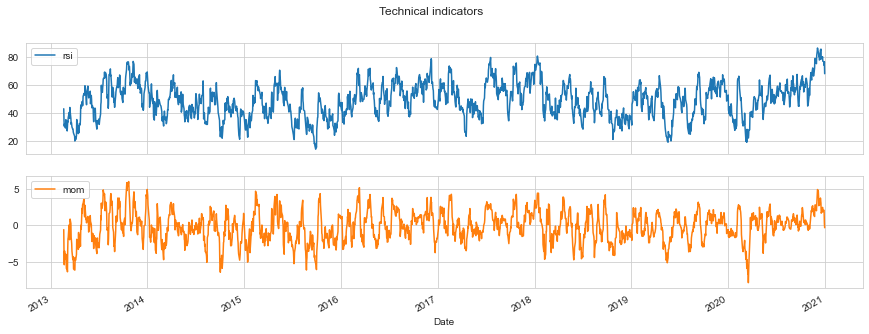

In [2]:
stock_name = 'mt'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1027.82, duration: 0:00:00.301066
episode: 2/2000, episode end value: 1115.78, duration: 0:00:00.459103
episode: 3/2000, episode end value: 1154.32, duration: 0:00:00.298069
episode: 4/2000, episode end value: 1227.60, duration: 0:00:00.263060
episode: 5/2000, episode end value: 1005.79, duration: 0:00:00.241053
episode: 6/2000, episode end value: 1077.51, duration: 0:00:00.271265
episode: 7/2000, episode end value: 1062.32, duration: 0:00:00.299065
episode: 8/2000, episode end value: 1092.62, duration: 0:00:00.257060
episode: 9/2000, episode end value: 1010.55, duration: 0:00:00.269057
episode: 10/2000, episode end value: 1237.66, duration: 0:00:00.219049
episode: 11/2000, episode end value: 1182.53, duration: 0:00:00.250056
episode: 12/2000, episode end value: 1055.37, duration: 0:00:00.225051
episode: 13/2000, episode end value: 1106.52, duration: 0:00:00.238051
episode: 14/2000, episode end value: 1066.85, duration: 0:00:00.247649
episode: 15/200

episode: 117/2000, episode end value: 1010.73, duration: 0:00:00.269057
episode: 118/2000, episode end value: 1065.02, duration: 0:00:00.321070
episode: 119/2000, episode end value: 991.34, duration: 0:00:00.355082
episode: 120/2000, episode end value: 1116.07, duration: 0:00:00.315067
episode: 121/2000, episode end value: 1022.03, duration: 0:00:00.310072
episode: 122/2000, episode end value: 1108.17, duration: 0:00:00.306069
episode: 123/2000, episode end value: 999.41, duration: 0:00:00.286065
episode: 124/2000, episode end value: 1036.26, duration: 0:00:00.298068
episode: 125/2000, episode end value: 1120.86, duration: 0:00:00.338075
episode: 126/2000, episode end value: 1044.23, duration: 0:00:00.235059
episode: 127/2000, episode end value: 1087.99, duration: 0:00:00.298068
episode: 128/2000, episode end value: 1006.79, duration: 0:00:00.302063
episode: 129/2000, episode end value: 1106.51, duration: 0:00:00.304068
episode: 130/2000, episode end value: 1068.14, duration: 0:00:00.2

episode: 231/2000, episode end value: 1066.69, duration: 0:00:00.456105
episode: 232/2000, episode end value: 1012.43, duration: 0:00:00.433097
episode: 233/2000, episode end value: 1048.12, duration: 0:00:00.460106
episode: 234/2000, episode end value: 1058.26, duration: 0:00:00.446100
episode: 235/2000, episode end value: 1061.17, duration: 0:00:00.490111
episode: 236/2000, episode end value: 1032.59, duration: 0:00:00.454103
episode: 237/2000, episode end value: 1051.52, duration: 0:00:00.481110
episode: 238/2000, episode end value: 1090.96, duration: 0:00:00.538124
episode: 239/2000, episode end value: 1068.91, duration: 0:00:00.412089
episode: 240/2000, episode end value: 1048.54, duration: 0:00:00.455100
episode: 241/2000, episode end value: 1063.07, duration: 0:00:00.496114
episode: 242/2000, episode end value: 1056.64, duration: 0:00:00.453010
episode: 243/2000, episode end value: 1085.21, duration: 0:00:00.438716
episode: 244/2000, episode end value: 1050.48, duration: 0:00:00

episode: 345/2000, episode end value: 1136.42, duration: 0:00:00.391089
episode: 346/2000, episode end value: 1168.20, duration: 0:00:00.437100
episode: 347/2000, episode end value: 1194.59, duration: 0:00:00.370085
episode: 348/2000, episode end value: 1134.73, duration: 0:00:00.344212
episode: 349/2000, episode end value: 1079.53, duration: 0:00:00.424097
episode: 350/2000, episode end value: 1080.24, duration: 0:00:00.433099
episode: 351/2000, episode end value: 1116.89, duration: 0:00:00.379084
episode: 352/2000, episode end value: 1075.92, duration: 0:00:00.401091
episode: 353/2000, episode end value: 1108.62, duration: 0:00:00.470107
episode: 354/2000, episode end value: 946.99, duration: 0:00:00.306073
episode: 355/2000, episode end value: 1064.27, duration: 0:00:00.479110
episode: 356/2000, episode end value: 1062.57, duration: 0:00:00.406084
episode: 357/2000, episode end value: 1131.14, duration: 0:00:00.403090
episode: 358/2000, episode end value: 1112.72, duration: 0:00:00.

episode: 459/2000, episode end value: 1080.88, duration: 0:00:00.460104
episode: 460/2000, episode end value: 1062.72, duration: 0:00:00.378086
episode: 461/2000, episode end value: 1061.59, duration: 0:00:00.404092
episode: 462/2000, episode end value: 1058.88, duration: 0:00:00.453102
episode: 463/2000, episode end value: 1054.93, duration: 0:00:00.424095
episode: 464/2000, episode end value: 1086.78, duration: 0:00:00.395081
episode: 465/2000, episode end value: 1051.37, duration: 0:00:00.415098
episode: 466/2000, episode end value: 1075.38, duration: 0:00:00.435093
episode: 467/2000, episode end value: 1074.88, duration: 0:00:00.366081
episode: 468/2000, episode end value: 1076.20, duration: 0:00:00.374085
episode: 469/2000, episode end value: 1068.56, duration: 0:00:00.407093
episode: 470/2000, episode end value: 1051.61, duration: 0:00:00.460199
episode: 471/2000, episode end value: 1088.35, duration: 0:00:00.442195
episode: 472/2000, episode end value: 1091.09, duration: 0:00:00

episode: 573/2000, episode end value: 1095.92, duration: 0:00:00.433099
episode: 574/2000, episode end value: 1173.07, duration: 0:00:00.440100
episode: 575/2000, episode end value: 1241.65, duration: 0:00:00.362083
episode: 576/2000, episode end value: 1055.18, duration: 0:00:00.469101
episode: 577/2000, episode end value: 1127.79, duration: 0:00:00.428094
episode: 578/2000, episode end value: 1104.40, duration: 0:00:00.370084
episode: 579/2000, episode end value: 1068.26, duration: 0:00:00.400092
episode: 580/2000, episode end value: 1102.77, duration: 0:00:00.463102
episode: 581/2000, episode end value: 1145.06, duration: 0:00:00.424093
episode: 582/2000, episode end value: 1109.69, duration: 0:00:00.473109
episode: 583/2000, episode end value: 1123.97, duration: 0:00:00.406093
episode: 584/2000, episode end value: 1164.97, duration: 0:00:00.369081
episode: 585/2000, episode end value: 1094.11, duration: 0:00:00.404090
episode: 586/2000, episode end value: 1061.20, duration: 0:00:00

episode: 687/2000, episode end value: 1044.15, duration: 0:00:00.472113
episode: 688/2000, episode end value: 1086.86, duration: 0:00:00.385087
episode: 689/2000, episode end value: 1081.89, duration: 0:00:00.390150
episode: 690/2000, episode end value: 1166.81, duration: 0:00:00.443098
episode: 691/2000, episode end value: 1164.07, duration: 0:00:00.404091
episode: 692/2000, episode end value: 944.53, duration: 0:00:00.316071
episode: 693/2000, episode end value: 1071.37, duration: 0:00:00.312068
episode: 694/2000, episode end value: 1093.01, duration: 0:00:00.373085
episode: 695/2000, episode end value: 1125.27, duration: 0:00:00.401091
episode: 696/2000, episode end value: 1157.90, duration: 0:00:00.432097
episode: 697/2000, episode end value: 1093.05, duration: 0:00:00.419095
episode: 698/2000, episode end value: 1199.20, duration: 0:00:00.461101
episode: 699/2000, episode end value: 1107.25, duration: 0:00:00.361085
episode: 700/2000, episode end value: 1121.82, duration: 0:00:00.

episode: 801/2000, episode end value: 1092.48, duration: 0:00:00.414099
episode: 802/2000, episode end value: 1070.15, duration: 0:00:00.447104
episode: 803/2000, episode end value: 1060.10, duration: 0:00:00.358078
episode: 804/2000, episode end value: 1055.47, duration: 0:00:00.439086
episode: 805/2000, episode end value: 1070.02, duration: 0:00:00.385978
episode: 806/2000, episode end value: 1071.93, duration: 0:00:00.401227
episode: 807/2000, episode end value: 1126.53, duration: 0:00:00.411090
episode: 808/2000, episode end value: 1030.80, duration: 0:00:00.459103
episode: 809/2000, episode end value: 1022.45, duration: 0:00:00.392093
episode: 810/2000, episode end value: 1126.81, duration: 0:00:00.444096
episode: 811/2000, episode end value: 1084.21, duration: 0:00:00.392086
episode: 812/2000, episode end value: 1087.44, duration: 0:00:00.429099
episode: 813/2000, episode end value: 1051.62, duration: 0:00:00.369078
episode: 814/2000, episode end value: 1033.23, duration: 0:00:00

episode: 915/2000, episode end value: 1070.49, duration: 0:00:00.418097
episode: 916/2000, episode end value: 1066.63, duration: 0:00:00.443100
episode: 917/2000, episode end value: 1096.96, duration: 0:00:00.398045
episode: 918/2000, episode end value: 1150.09, duration: 0:00:00.422050
episode: 919/2000, episode end value: 1163.42, duration: 0:00:00.430098
episode: 920/2000, episode end value: 1095.86, duration: 0:00:00.438105
episode: 921/2000, episode end value: 1121.57, duration: 0:00:00.449099
episode: 922/2000, episode end value: 1120.72, duration: 0:00:00.415096
episode: 923/2000, episode end value: 1085.59, duration: 0:00:00.383083
episode: 924/2000, episode end value: 1117.41, duration: 0:00:00.421094
episode: 925/2000, episode end value: 1075.61, duration: 0:00:00.388088
episode: 926/2000, episode end value: 1186.12, duration: 0:00:00.439101
episode: 927/2000, episode end value: 1028.16, duration: 0:00:00.401096
episode: 928/2000, episode end value: 1010.89, duration: 0:00:00

episode: 1029/2000, episode end value: 1138.18, duration: 0:00:00.437097
episode: 1030/2000, episode end value: 1073.23, duration: 0:00:00.404089
episode: 1031/2000, episode end value: 1135.61, duration: 0:00:00.397090
episode: 1032/2000, episode end value: 1106.32, duration: 0:00:00.391087
episode: 1033/2000, episode end value: 1100.13, duration: 0:00:00.407134
episode: 1034/2000, episode end value: 1082.15, duration: 0:00:00.385142
episode: 1035/2000, episode end value: 1129.06, duration: 0:00:00.417870
episode: 1036/2000, episode end value: 1071.76, duration: 0:00:00.352078
episode: 1037/2000, episode end value: 1171.11, duration: 0:00:00.407092
episode: 1038/2000, episode end value: 1096.23, duration: 0:00:00.399088
episode: 1039/2000, episode end value: 1077.36, duration: 0:00:00.330075
episode: 1040/2000, episode end value: 1121.69, duration: 0:00:00.389088
episode: 1041/2000, episode end value: 1125.62, duration: 0:00:00.364080
episode: 1042/2000, episode end value: 1087.35, dur

episode: 1142/2000, episode end value: 1078.99, duration: 0:00:00.399087
episode: 1143/2000, episode end value: 1074.81, duration: 0:00:00.407093
episode: 1144/2000, episode end value: 1069.56, duration: 0:00:00.413092
episode: 1145/2000, episode end value: 1082.84, duration: 0:00:00.487109
episode: 1146/2000, episode end value: 1179.68, duration: 0:00:00.381087
episode: 1147/2000, episode end value: 1051.09, duration: 0:00:00.357076
episode: 1148/2000, episode end value: 1066.64, duration: 0:00:00.407092
episode: 1149/2000, episode end value: 1105.43, duration: 0:00:00.469110
episode: 1150/2000, episode end value: 1186.60, duration: 0:00:00.407087
episode: 1151/2000, episode end value: 1122.52, duration: 0:00:00.375085
episode: 1152/2000, episode end value: 1121.48, duration: 0:00:00.411094
episode: 1153/2000, episode end value: 1128.44, duration: 0:00:00.479112
episode: 1154/2000, episode end value: 1098.20, duration: 0:00:00.370080
episode: 1155/2000, episode end value: 1109.15, dur

episode: 1255/2000, episode end value: 1087.69, duration: 0:00:00.402088
episode: 1256/2000, episode end value: 1107.36, duration: 0:00:00.430095
episode: 1257/2000, episode end value: 1035.31, duration: 0:00:00.393098
episode: 1258/2000, episode end value: 1169.91, duration: 0:00:00.421025
episode: 1259/2000, episode end value: 1069.70, duration: 0:00:00.426081
episode: 1260/2000, episode end value: 1113.57, duration: 0:00:00.449099
episode: 1261/2000, episode end value: 1145.57, duration: 0:00:00.404085
episode: 1262/2000, episode end value: 1135.29, duration: 0:00:00.389089
episode: 1263/2000, episode end value: 1136.08, duration: 0:00:00.397095
episode: 1264/2000, episode end value: 1130.36, duration: 0:00:00.376081
episode: 1265/2000, episode end value: 1155.72, duration: 0:00:00.444101
episode: 1266/2000, episode end value: 1131.47, duration: 0:00:00.413092
episode: 1267/2000, episode end value: 1128.56, duration: 0:00:00.450095
episode: 1268/2000, episode end value: 1052.52, dur

episode: 1368/2000, episode end value: 1074.11, duration: 0:00:00.409087
episode: 1369/2000, episode end value: 1122.18, duration: 0:00:00.444102
episode: 1370/2000, episode end value: 1031.54, duration: 0:00:00.410088
episode: 1371/2000, episode end value: 1096.55, duration: 0:00:00.402091
episode: 1372/2000, episode end value: 1082.37, duration: 0:00:00.434097
episode: 1373/2000, episode end value: 1086.30, duration: 0:00:00.421089
episode: 1374/2000, episode end value: 1133.91, duration: 0:00:00.426104
episode: 1375/2000, episode end value: 1116.96, duration: 0:00:00.365078
episode: 1376/2000, episode end value: 1049.02, duration: 0:00:00.377082
episode: 1377/2000, episode end value: 1214.31, duration: 0:00:00.461104
episode: 1378/2000, episode end value: 1065.14, duration: 0:00:00.406094
episode: 1379/2000, episode end value: 1090.32, duration: 0:00:00.421090
episode: 1380/2000, episode end value: 1117.59, duration: 0:00:00.393088
episode: 1381/2000, episode end value: 1123.53, dur

episode: 1481/2000, episode end value: 1070.35, duration: 0:00:00.322073
episode: 1482/2000, episode end value: 1206.85, duration: 0:00:00.459103
episode: 1483/2000, episode end value: 1063.34, duration: 0:00:00.348076
episode: 1484/2000, episode end value: 1211.08, duration: 0:00:00.360079
episode: 1485/2000, episode end value: 1139.37, duration: 0:00:00.366089
episode: 1486/2000, episode end value: 1092.25, duration: 0:00:00.395082
episode: 1487/2000, episode end value: 1128.80, duration: 0:00:00.393089
episode: 1488/2000, episode end value: 1177.94, duration: 0:00:00.380090
episode: 1489/2000, episode end value: 1057.94, duration: 0:00:00.384084
episode: 1490/2000, episode end value: 1082.00, duration: 0:00:00.415098
episode: 1491/2000, episode end value: 1100.57, duration: 0:00:00.421096
episode: 1492/2000, episode end value: 1120.62, duration: 0:00:00.368087
episode: 1493/2000, episode end value: 1091.91, duration: 0:00:00.430099
episode: 1494/2000, episode end value: 1159.68, dur

episode: 1594/2000, episode end value: 1117.94, duration: 0:00:00.376086
episode: 1595/2000, episode end value: 1121.73, duration: 0:00:00.361084
episode: 1596/2000, episode end value: 1063.32, duration: 0:00:00.423094
episode: 1597/2000, episode end value: 1086.50, duration: 0:00:00.439098
episode: 1598/2000, episode end value: 1058.86, duration: 0:00:00.398090
episode: 1599/2000, episode end value: 1110.96, duration: 0:00:00.457101
episode: 1600/2000, episode end value: 1097.45, duration: 0:00:00.329079
episode: 1601/2000, episode end value: 1037.29, duration: 0:00:00.446098
episode: 1602/2000, episode end value: 1101.93, duration: 0:00:00.407090
episode: 1603/2000, episode end value: 1085.55, duration: 0:00:00.412097
episode: 1604/2000, episode end value: 1058.70, duration: 0:00:00.434094
episode: 1605/2000, episode end value: 1043.09, duration: 0:00:00.413093
episode: 1606/2000, episode end value: 1052.45, duration: 0:00:00.421093
episode: 1607/2000, episode end value: 1176.25, dur

episode: 1707/2000, episode end value: 1132.32, duration: 0:00:00.357083
episode: 1708/2000, episode end value: 1092.40, duration: 0:00:00.439093
episode: 1709/2000, episode end value: 1123.74, duration: 0:00:00.344078
episode: 1710/2000, episode end value: 1150.85, duration: 0:00:00.331078
episode: 1711/2000, episode end value: 1110.59, duration: 0:00:00.350075
episode: 1712/2000, episode end value: 1116.92, duration: 0:00:00.387088
episode: 1713/2000, episode end value: 1087.63, duration: 0:00:00.375083
episode: 1714/2000, episode end value: 1093.04, duration: 0:00:00.361081
episode: 1715/2000, episode end value: 1088.60, duration: 0:00:00.352081
episode: 1716/2000, episode end value: 1043.46, duration: 0:00:00.349084
episode: 1717/2000, episode end value: 1048.23, duration: 0:00:00.426098
episode: 1718/2000, episode end value: 1104.33, duration: 0:00:00.395084
episode: 1719/2000, episode end value: 1135.43, duration: 0:00:00.371082
episode: 1720/2000, episode end value: 1115.07, dur

episode: 1820/2000, episode end value: 1140.26, duration: 0:00:00.412095
episode: 1821/2000, episode end value: 1127.10, duration: 0:00:00.324072
episode: 1822/2000, episode end value: 1131.12, duration: 0:00:00.332075
episode: 1823/2000, episode end value: 1050.97, duration: 0:00:00.376084
episode: 1824/2000, episode end value: 1137.23, duration: 0:00:00.329074
episode: 1825/2000, episode end value: 1050.30, duration: 0:00:00.320071
episode: 1826/2000, episode end value: 1118.41, duration: 0:00:00.353077
episode: 1827/2000, episode end value: 1083.90, duration: 0:00:00.324074
episode: 1828/2000, episode end value: 1098.78, duration: 0:00:00.333075
episode: 1829/2000, episode end value: 1012.65, duration: 0:00:00.353077
episode: 1830/2000, episode end value: 1119.48, duration: 0:00:00.325072
episode: 1831/2000, episode end value: 1070.00, duration: 0:00:00.344080
episode: 1832/2000, episode end value: 1084.76, duration: 0:00:00.443098
episode: 1833/2000, episode end value: 1054.66, dur

episode: 1933/2000, episode end value: 1106.43, duration: 0:00:00.300068
episode: 1934/2000, episode end value: 1108.17, duration: 0:00:00.332075
episode: 1935/2000, episode end value: 1062.37, duration: 0:00:00.326077
episode: 1936/2000, episode end value: 1133.70, duration: 0:00:00.320078
episode: 1937/2000, episode end value: 1173.63, duration: 0:00:00.325072
episode: 1938/2000, episode end value: 1094.98, duration: 0:00:00.321071
episode: 1939/2000, episode end value: 1097.92, duration: 0:00:00.321073
episode: 1940/2000, episode end value: 1081.42, duration: 0:00:00.313074
episode: 1941/2000, episode end value: 1054.38, duration: 0:00:00.323073
episode: 1942/2000, episode end value: 1166.23, duration: 0:00:00.333076
episode: 1943/2000, episode end value: 1086.36, duration: 0:00:00.386092
episode: 1944/2000, episode end value: 1084.00, duration: 0:00:00.410088
episode: 1945/2000, episode end value: 1056.61, duration: 0:00:00.342074
episode: 1946/2000, episode end value: 1052.87, dur

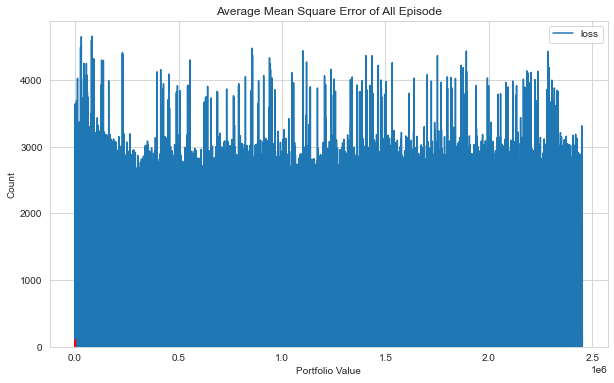

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

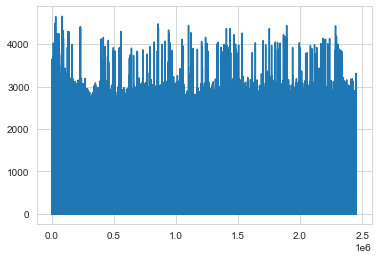

In [5]:
plt.plot(agent.model.losses)

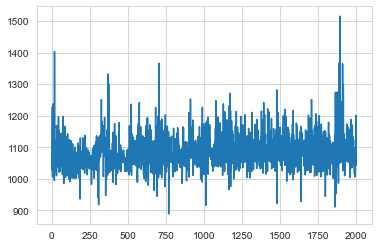

In [6]:
plt.plot(portfolio_value)

episode end value: 1009.56, duration: 0:00:00.108023
Sell: 177 times, Buy: 168 times


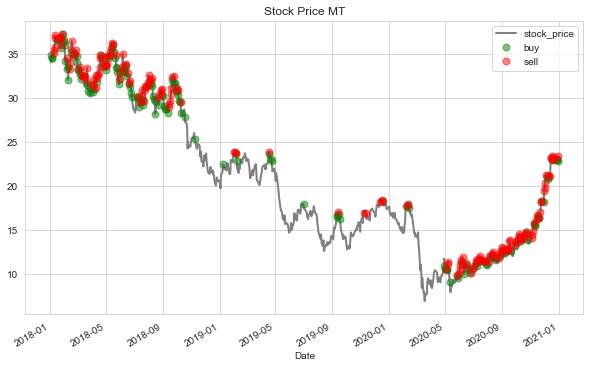

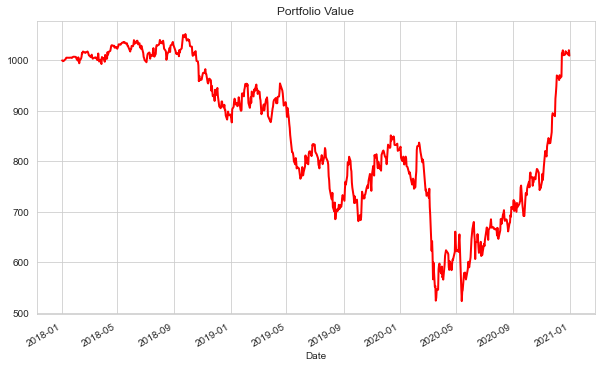

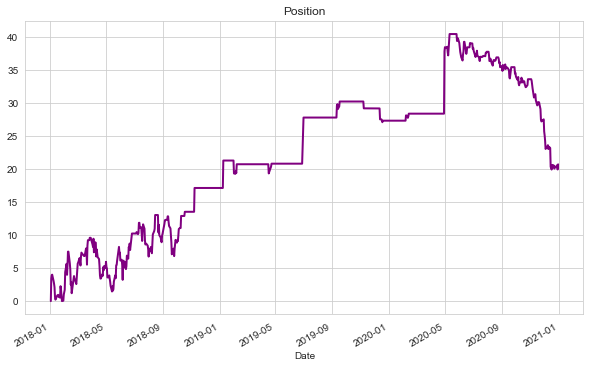

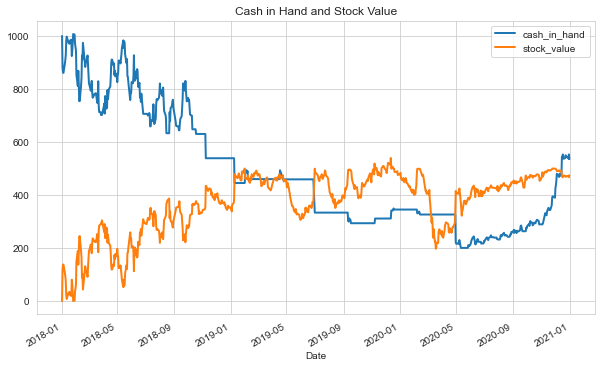

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: MT
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 0.32 %
Volatility: 0.2734
shape ratio: -0.0286
Maximun drawdown: -50.32 %
Calmar ratio: 0.0063
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -12.41 %
Volatility (benchmark): 0.5356
shape ratio: -0.2523
Maximun drawdown: -81.37 %
Calmar ratio (benchmark): -0.1525


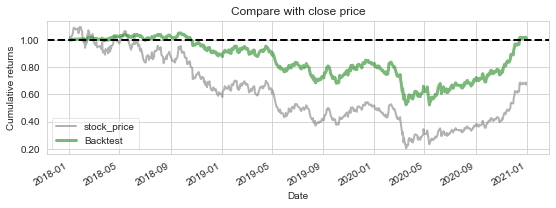

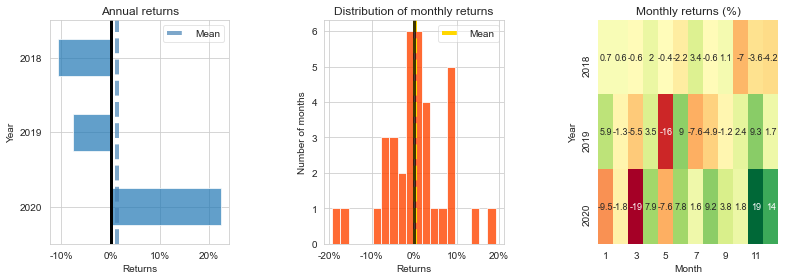

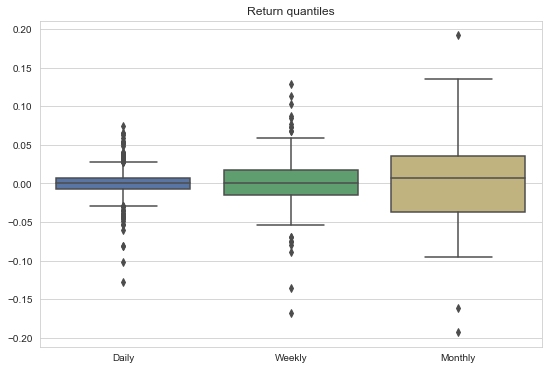

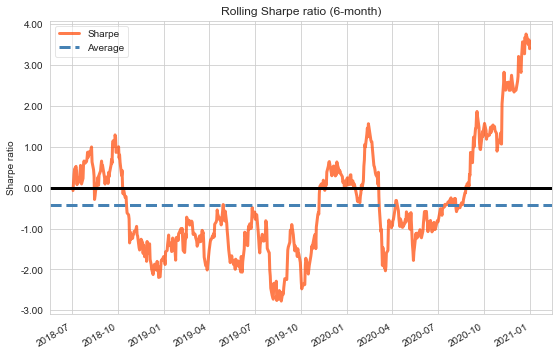

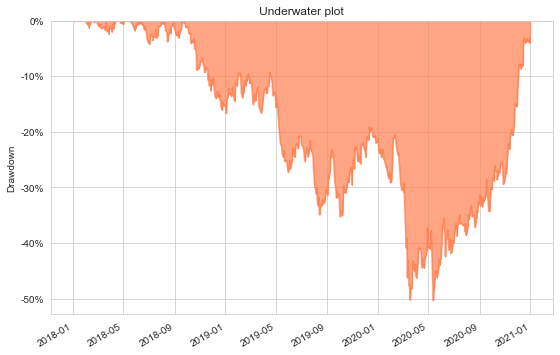

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')